In [1]:
import os
import scanpy as sc
import pandas as pd
import numpy as np
import scipy.stats as stats

home = '/home/kojo/Code/temporary-trvae-clone'
os.chdir(home)

In [2]:
specific_cell_type = "3m"
trvae_reconstructed = sc.read(f"./data/reconstructed/trVAE_alzPro/{specific_cell_type}.h5ad")
trvae_reconstructed.obs

,Qi ID,sex,Group,Timepoint,n_counts,batch
8-0,3346,F,WT_to_HET,3m,6.196362e+09,0
9-0,3347,F,WT_to_HET,3m,6.794262e+09,0
10-0,3388,F,WT_to_HET,3m,7.239526e+09,0
11-0,3389,F,WT_to_HET,3m,6.479385e+09,0
12-0,3606,M,WT_to_HET,3m,7.353696e+09,0
13-0,3607,M,WT_to_HET,3m,8.290053e+09,0
14-0,3608,M,WT_to_HET,3m,6.614078e+09,0
15-0,3609,M,WT_to_HET,3m,8.094854e+09,0
0-1,3131,M,HET,3m,5.458209e+09,1
1-1,3132,M,HET,3m,7.439315e+09,1


In [3]:
dist1 = trvae_reconstructed[trvae_reconstructed.obs["Group"] == "WT_to_HET"]
dist1.obs

,Qi ID,sex,Group,Timepoint,n_counts,batch
8-0,3346,F,WT_to_HET,3m,6.196362e+09,0
9-0,3347,F,WT_to_HET,3m,6.794262e+09,0
10-0,3388,F,WT_to_HET,3m,7.239526e+09,0
11-0,3389,F,WT_to_HET,3m,6.479385e+09,0
12-0,3606,M,WT_to_HET,3m,7.353696e+09,0
13-0,3607,M,WT_to_HET,3m,8.290053e+09,0
14-0,3608,M,WT_to_HET,3m,6.614078e+09,0
15-0,3609,M,WT_to_HET,3m,8.094854e+09,0


In [4]:
dist2 = trvae_reconstructed[trvae_reconstructed.obs["Group"] == "HET"]
dist2.obs

,Qi ID,sex,Group,Timepoint,n_counts,batch
0-1,3131,M,HET,3m,5.458209e+09,1
1-1,3132,M,HET,3m,7.439315e+09,1
2-1,3140,M,HET,3m,6.016821e+09,1
3-1,3141,M,HET,3m,7.549487e+09,1
4-1,3153,F,HET,3m,7.475885e+09,1
5-1,3154,F,HET,3m,7.624840e+09,1
6-1,3156,F,HET,3m,4.729855e+09,1
7-1,3157,F,HET,3m,7.761574e+09,1


In [5]:
len(dist1.X[0])

1729

In [6]:
dist1.var.index[0]

'A2A432|CUL4B'

In [7]:
dist2.X[:,0]

ArrayView([12.557371, 12.622407, 12.645137, 12.316049, 12.431604,
           12.252935, 12.775632, 12.459983], dtype=float32)

In [8]:
dist1.X[:,0]

ArrayView([9.272251, 9.246584, 9.28266 , 9.187363, 9.114222, 9.220908,
           9.242485, 8.941264], dtype=float32)

In [12]:
stats.ttest_ind(dist2.X[:,0], dist1.X[:,0])

Ttest_indResult(statistic=44.91151550342241, pvalue=1.553465768494924e-16)

In [17]:
protein_tests = {}
for i in range(1729):
    protein_tests[stats.ttest_ind(dist2.X[:,i], dist1.X[:,i]).pvalue] = dist1.var.index[i]

print(max(protein_tests))

0.9911026800907181


In [27]:
protein_lists = sorted(protein_tests.keys(), reverse=True)
protein_tests = {pval: protein_tests[pval] for pval in protein_lists}
proteins = protein_tests.values()
proteins

dict_values(['P97355|SPSY', 'Q62426|CYTB', 'O54988|SLK', 'Q8VEH5|EPMIP', 'P62715|PP2AB', 'Q99K48|NONO', 'Q9D0R2|SYTC', 'Q9DB73|NB5R1', 'Q03517|SCG2', 'Q99KC8|VMA5A', 'Q505F5|LRC47', 'P34914|HYES', 'Q9WVE8|PACN2', 'P13020|GELS', 'Q8R2Y0|ABHD6', 'Q8VHL1|SETD7', 'Q9QZB7|ARP10', 'Q6NS52|DGKB', 'O35449|PRRT1', 'O55106|STRN', 'P97371|PSME1', 'Q9Z1L5|CA2D3', 'Q3UQ44|IQGA2', 'Q99LG2|TNPO2', 'Q9D2V7|CORO7', 'Q922E4|PCY2', 'Q9D8B7|JAM3', 'Q8K4G5|ABLM1', 'P16460|ASSY', 'Q8VBY2|KKCC1', 'P97492|RGS14', 'Q8K221|ARFP2', 'P51830|ADCY9', 'Q08460|KCMA1', 'Q61290|CAC1E', 'O70172|PI42A', 'Q8C8N2|SCAI', 'Q9DBL1|ACDSB', 'Q8CDG3|VCIP1', 'Q9D154|ILEUA', 'Q6PFD5|DLGP3', 'Q9D6Z1|NOP56', 'Q61234|SNTA1', 'P14106|C1QB', 'Q9QZF2|GPC1', 'Q61696|HS71A', 'O88910|MPP3', 'P51655|GPC4', 'Q80U49|C170B', 'P97390|VPS45', 'Q9CZS1|AL1B1', 'O55026|ENTP2', 'Q91ZP9|NECA2', 'Q9CZT8|RAB3B', 'Q7TME0|PLPR4', 'Q8VHW2|CCG8', 'P84089|ERH', 'Q60625|ICAM5', 'P50571|GBRB1', 'Q9WVA3|BUB3', 'Q8C078|KKCC2', 'Q8CC35|SYNPO', 'Q9QYS2|GRM3', 'Q9

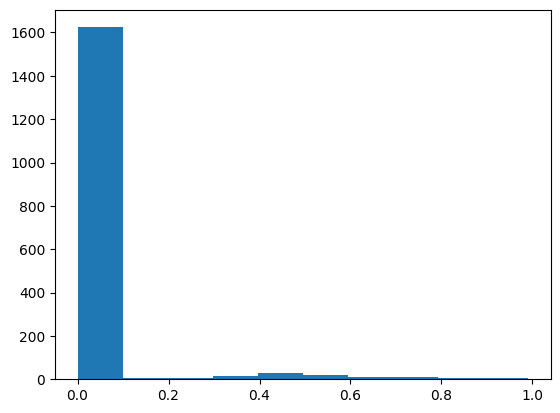

In [22]:
import matplotlib.pyplot as plt

plt.hist(protein_tests.keys())
plt.show()

In [26]:
vals = protein_tests.keys()
stuff = [val for val in vals if val < 0.05]
len(stuff)/len(vals)

0.9375361480624639

In [29]:
proteins_up = list(proteins)[:50]
proteins_up

['P97355|SPSY',
 'Q62426|CYTB',
 'O54988|SLK',
 'Q8VEH5|EPMIP',
 'P62715|PP2AB',
 'Q99K48|NONO',
 'Q9D0R2|SYTC',
 'Q9DB73|NB5R1',
 'Q03517|SCG2',
 'Q99KC8|VMA5A',
 'Q505F5|LRC47',
 'P34914|HYES',
 'Q9WVE8|PACN2',
 'P13020|GELS',
 'Q8R2Y0|ABHD6',
 'Q8VHL1|SETD7',
 'Q9QZB7|ARP10',
 'Q6NS52|DGKB',
 'O35449|PRRT1',
 'O55106|STRN',
 'P97371|PSME1',
 'Q9Z1L5|CA2D3',
 'Q3UQ44|IQGA2',
 'Q99LG2|TNPO2',
 'Q9D2V7|CORO7',
 'Q922E4|PCY2',
 'Q9D8B7|JAM3',
 'Q8K4G5|ABLM1',
 'P16460|ASSY',
 'Q8VBY2|KKCC1',
 'P97492|RGS14',
 'Q8K221|ARFP2',
 'P51830|ADCY9',
 'Q08460|KCMA1',
 'Q61290|CAC1E',
 'O70172|PI42A',
 'Q8C8N2|SCAI',
 'Q9DBL1|ACDSB',
 'Q8CDG3|VCIP1',
 'Q9D154|ILEUA',
 'Q6PFD5|DLGP3',
 'Q9D6Z1|NOP56',
 'Q61234|SNTA1',
 'P14106|C1QB',
 'Q9QZF2|GPC1',
 'Q61696|HS71A',
 'O88910|MPP3',
 'P51655|GPC4',
 'Q80U49|C170B',
 'P97390|VPS45']

In [30]:
proteins_down = list(proteins)[-50:]
proteins_down

['Q8CHC4|SYNJ1',
 'Q8R1Q8|DC1L1',
 'P18760|COF1',
 'P19783|COX41',
 'Q64433|CH10',
 'Q60864|STIP1',
 'Q61990|PCBP2',
 'Q9CZU6|CISY',
 'P28271|ACOC',
 'O35864|CSN5',
 'Q9D6J6|NDUV2',
 'Q9CQM9|GLRX3',
 'Q8BFR5|EFTU',
 'Q8R0A7|K0513',
 'Q9CZM2|RL15',
 'P61089|UBE2N',
 'P50396|GDIA',
 'P12970|RL7A',
 'P34884|MIF',
 'Q9DCT2|NDUS3',
 'P10126|EF1A1',
 'Q91XM9|DLG2',
 'Q62420|SH3G2',
 'P35803|GPM6B',
 'P47708|RP3A',
 'Q8C8R3|ANK2',
 'P62259|1433E',
 'Q8CIE6|COPA',
 'P17183|ENOG',
 'P63038|CH60',
 'P97461|RS5',
 'P13595|NCAM1',
 'Q91V12|BACH',
 'Q8BMF4|ODP2',
 'P08249|MDHM',
 'Q8C419|GP158',
 'P48318|DCE1',
 'Q8QZT1|THIL',
 'Q99LD4|CSN1',
 'Q9DCS9|NDUBA',
 'P08113|ENPL',
 'Q9DB77|QCR2',
 'P46638|RB11B',
 'Q99L47|F10A1',
 'Q61081|CDC37',
 'Q9JKC6|CEND',
 'Q62425|NDUA4',
 'Q8JZU2|TXTP',
 'Q61735|CD47',
 'P35283|RAB12']